In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

# Reading Data

In [26]:
Bank_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
#data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [27]:
Bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [28]:
Bank_data.shape

(5000, 14)

In [29]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [30]:
Bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [31]:
Bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [32]:
Bank_data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

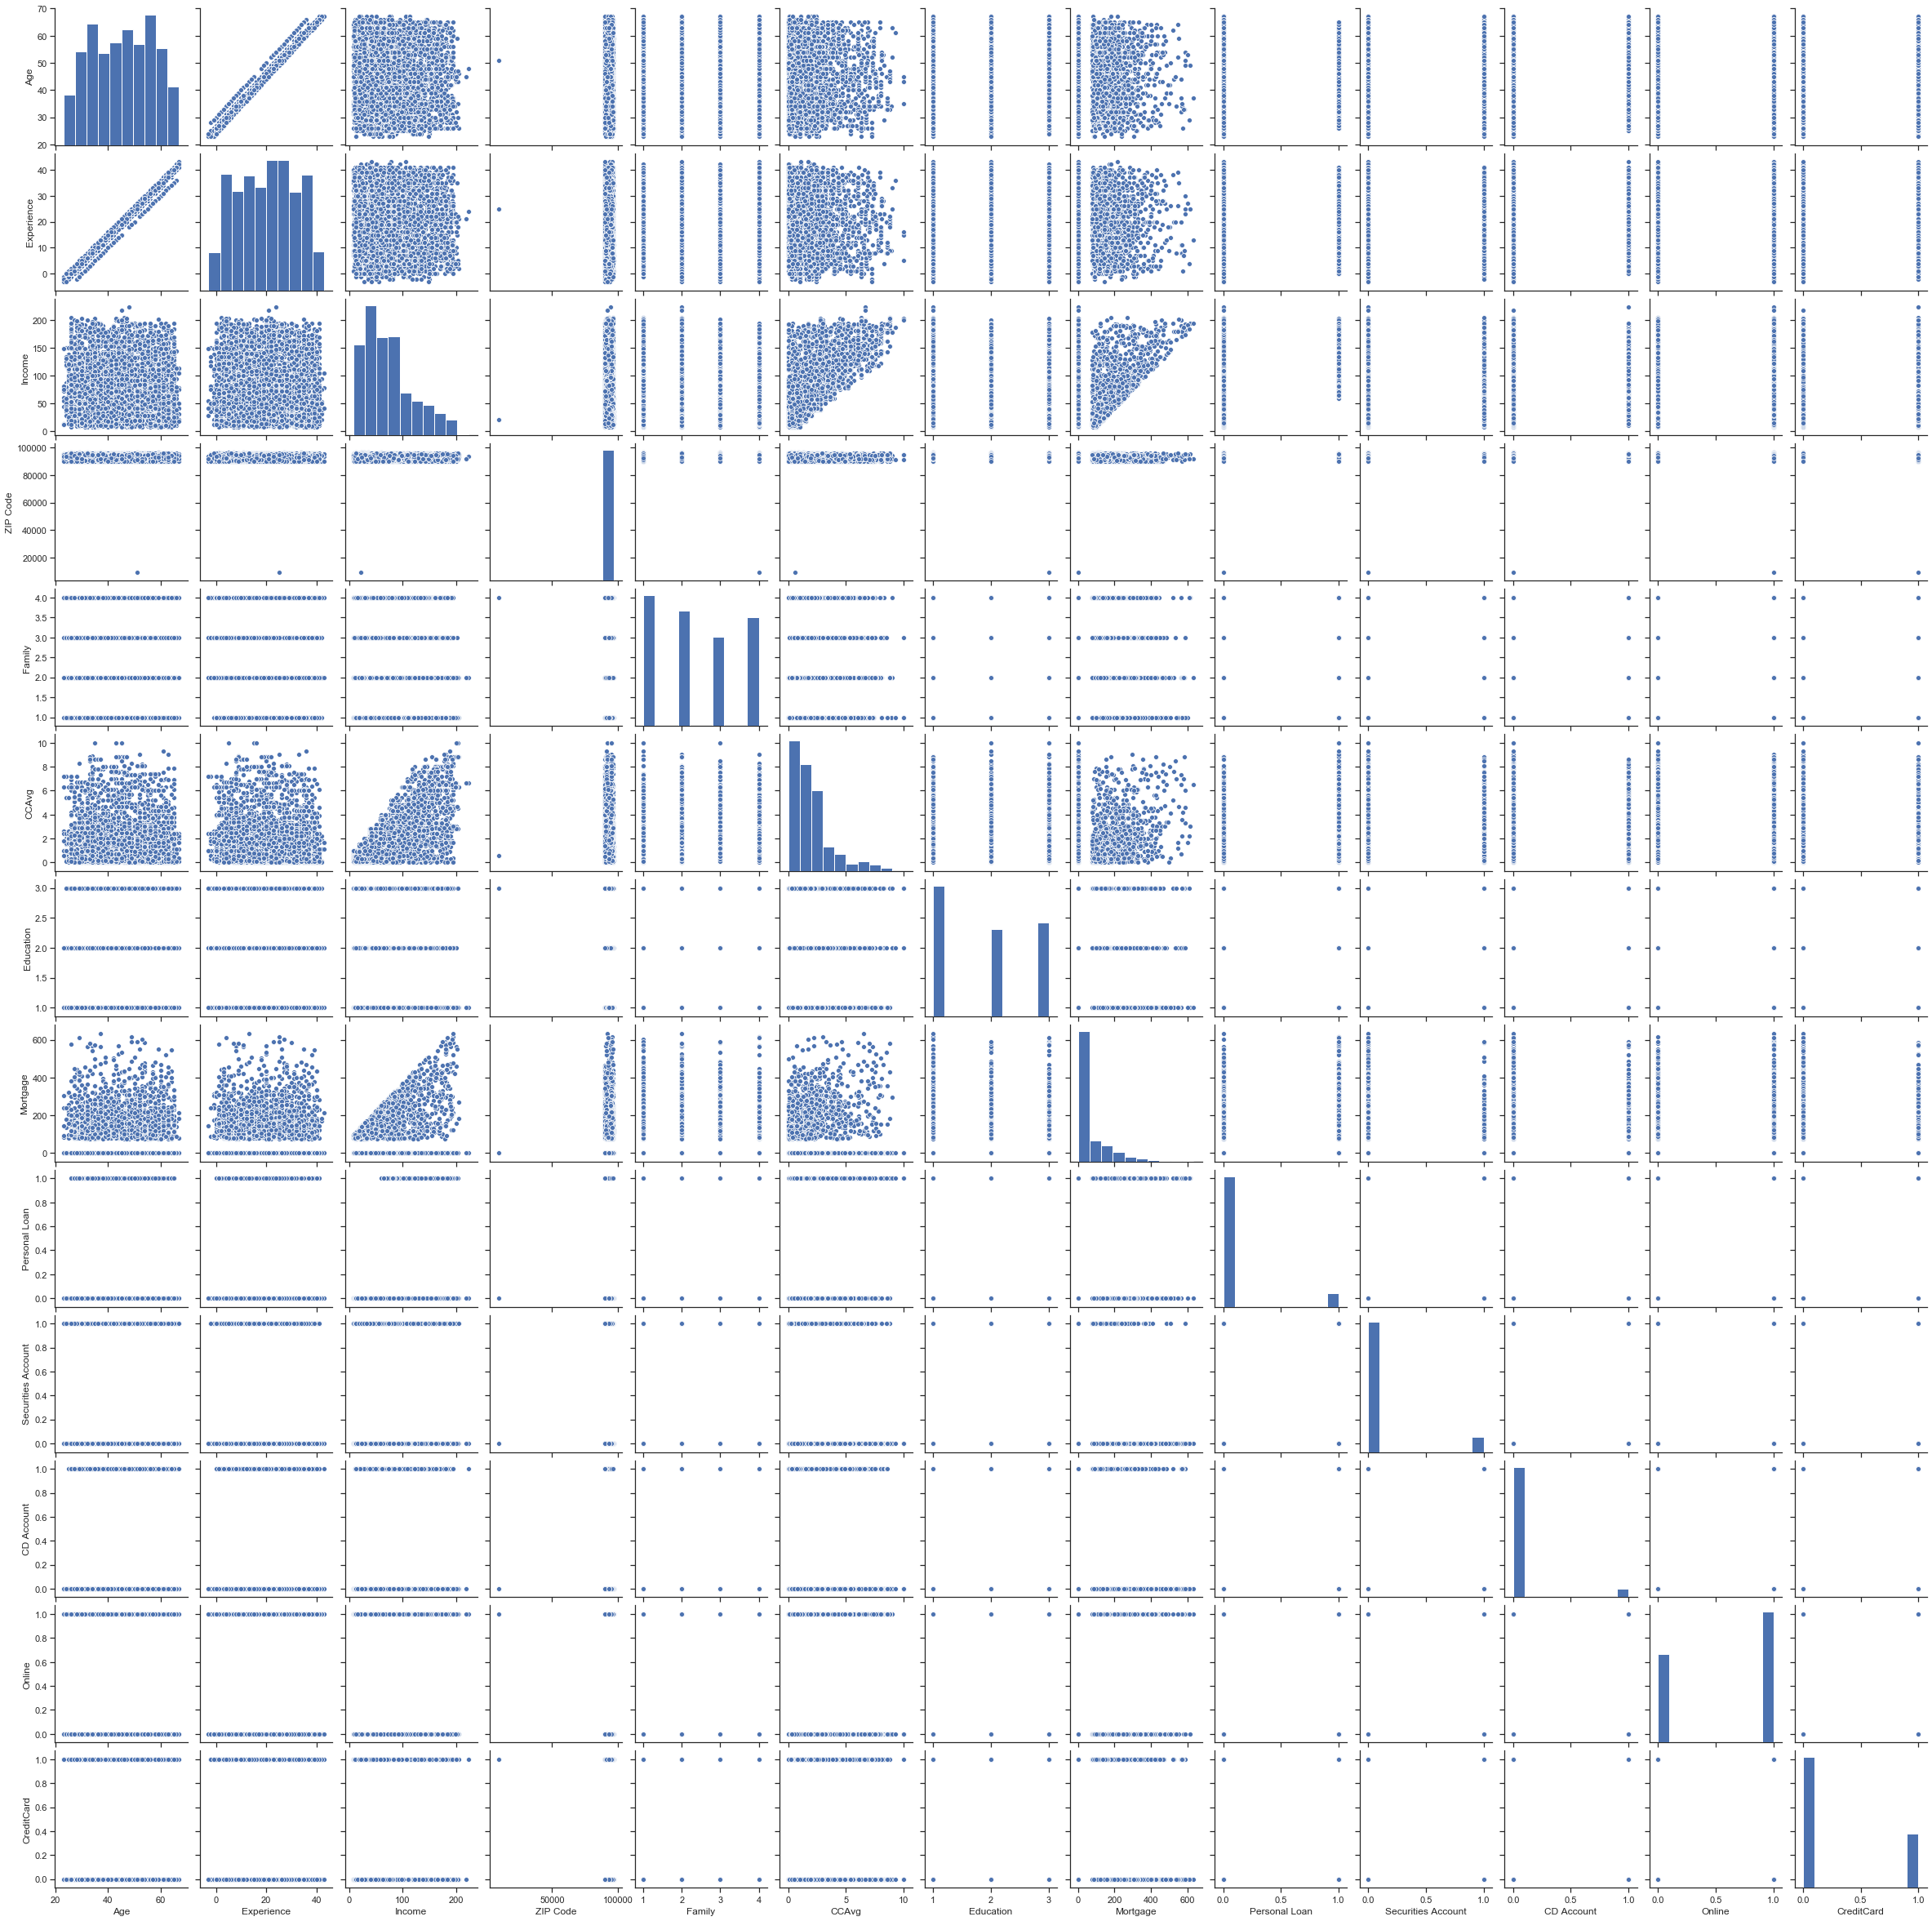

In [33]:
sns.pairplot(Bank_data.iloc[:,1:]);

In [34]:
# there are 52 records with negative experience. Before proceeding any further we need to clean the same

Bank_data[Bank_data['Experience'] < 0]['Experience'].count()

52

In [35]:
#clean the negative variable
dfExp = Bank_data.loc[Bank_data['Experience'] >0]
negExp = Bank_data.Experience < 0
column_name = 'Experience'
# getting the customer ID who has negative experience
mylist = Bank_data.loc[negExp]['ID'].tolist() 


In [36]:
# there are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [37]:
for id in mylist:
    age = Bank_data.loc[np.where(Bank_data['ID']==id)]["Age"].tolist()[0]
    education = Bank_data.loc[np.where(Bank_data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    Bank_data.loc[Bank_data.loc[np.where(Bank_data['ID']==id)].index, 'Experience'] = exp

In [38]:
# checking if there are records with negative experience

Bank_data[Bank_data['Experience'] < 0]['Experience'].count()

0

In [39]:
Bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Influence of income and education on personal loan

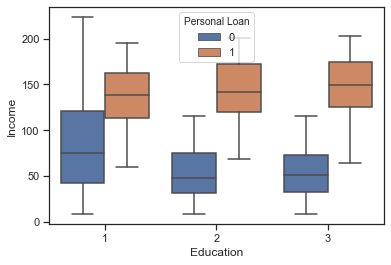

In [40]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=Bank_data);

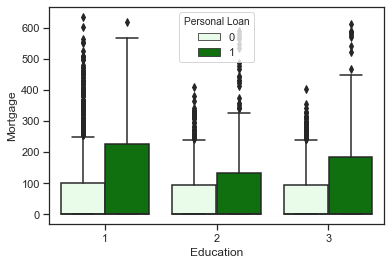

In [41]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=Bank_data,color='green');

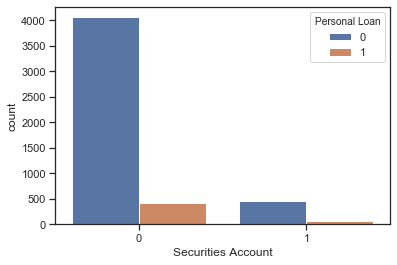

In [42]:
sns.countplot(x="Securities Account", data=Bank_data,hue="Personal Loan");

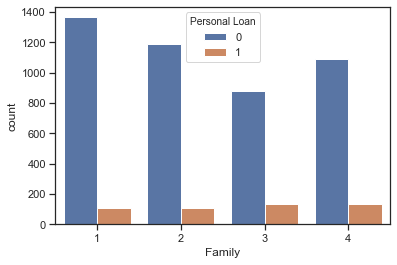

In [43]:
sns.countplot(x='Family',data=Bank_data,hue='Personal Loan');

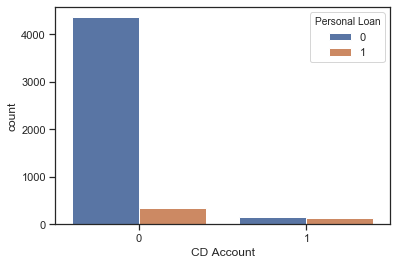

In [44]:
sns.countplot(x='CD Account',data=Bank_data,hue='Personal Loan');

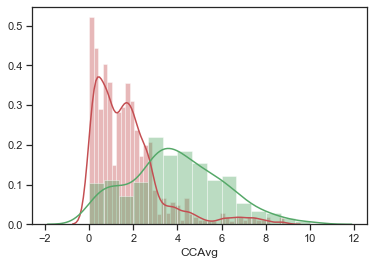

In [45]:
sns.distplot( Bank_data[Bank_data['Personal Loan'] == 0]['CCAvg'], color = 'r');
sns.distplot( Bank_data[Bank_data['Personal Loan'] == 1]['CCAvg'], color = 'g');

In [46]:
print('Credit card spending of Non-Loan customers: ',Bank_data[Bank_data['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', Bank_data[Bank_data['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Text(0, 0.5, 'Age')

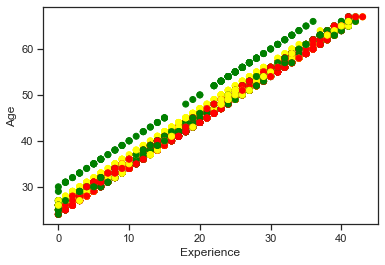

In [47]:
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(Bank_data['Experience'],Bank_data['Age'],c=Bank_data['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

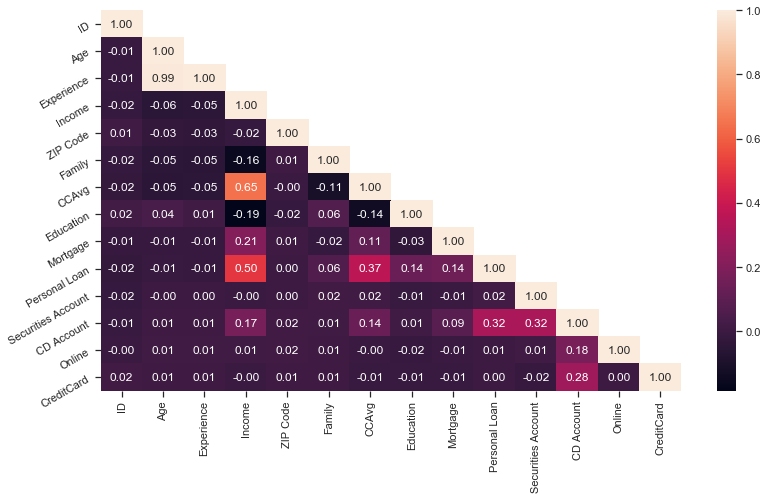

In [49]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = Bank_data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

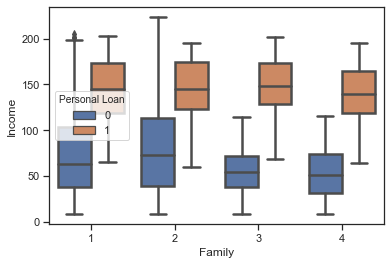

In [50]:
sns.boxplot(x=Bank_data.Family,y=Bank_data.Income,hue=Bank_data['Personal Loan']);
# Looking at the below plot, families with income less than 100K are less likely to take loan,than families with 
# high income

# Applying models

In [51]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Bank_data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [52]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

# Naive Bayes

In [53]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

# KNN

In [58]:
train_set_indep = Bank_data.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = Bank_data["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [70]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9106070713809206


# Logistic Regression

In [73]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
Logistic_model = LogisticRegression(solver="liblinear")
Logistic_model.fit(X_Train, Y_Train)
#predict on test
y_predict = Logistic_model.predict(X_Test)


coef_df = pd.DataFrame(Logistic_model.coef_)
coef_df['intercept'] = Logistic_model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.015818  0.037247 -0.000074  0.012765  0.005019  0.013392  0.000197   

          7         8         9        10  intercept  
0  0.000861  0.004152  0.000128  0.000002  -0.000094  


In [66]:
model_score = Logistic_model.score(X_Test, Y_Test)
print(model_score)

0.9079386257505003


# Model comparison

In [67]:
X=Bank_data.drop(['Personal Loan','Experience','ID'],axis=1)
y=Bank_data.pop('Personal Loan')

KNN: 0.898600 (0.008902)
NB: 0.885600 (0.010385)


C:\Users\ADITI\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADITI\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADITI\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADITI\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADITI\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.908200 (0.007871)


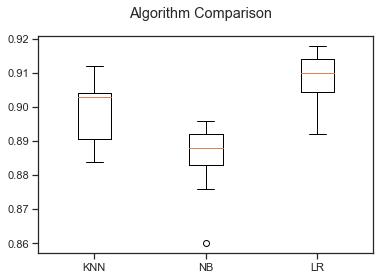

In [71]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()